<a href="https://colab.research.google.com/github/GarvinAgweli/personal/blob/main/Banking_Churn_Analysis_%26_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#STEP_1:DATA LOADING
# import all the required libraries and dependencies for dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all the required libraries and dependencies for machine learning

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import statsmodels.api as sm
import pickle
import gc
from sklearn import svm
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [9]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [10]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [11]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [12]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [13]:
df['HasCrCard'].value_counts()

,count
HasCrCard,
1,7055
0,2945


In [14]:
df['IsActiveMember'].value_counts()

,count
IsActiveMember,
1,5151
0,4849


In [15]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [16]:
df['Tenure'].value_counts()

,count
Tenure,
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967


In [17]:
df['CreditScore'].value_counts()

,count
CreditScore,
850,233
678,63
655,54
705,53
667,53
...,...
358,1
412,1
382,1


In [18]:
df['NumOfProducts'].value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


In [19]:
df['Age'].value_counts()

,count
Age,
37,478
38,477
35,474
36,456
34,447
...,...
84,2
82,1
88,1


In [20]:
df.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [21]:
df.sample(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
9948,9949,15735078,Onwughara,724,Germany,Female,53,1,139687.66,2,1,1,12913.92,0
2282,2283,15642787,Ijendu,572,France,Male,37,1,133043.66,1,0,0,111243.09,0
2069,2070,15790379,Rowe,629,Germany,Male,28,8,108601.00,1,1,1,119647.70,0
5090,5091,15642709,Feng,474,France,Female,30,9,0.00,2,0,0,63158.22,0
5014,5015,15773731,John,758,Spain,Female,35,5,0.00,2,0,0,100365.51,0


In [22]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [23]:
df.rename(columns={'Exited':'Churned'}, inplace=True)

In [24]:
df['Churned'].replace({0:"No",1:"Yes"},inplace=True)

In [25]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


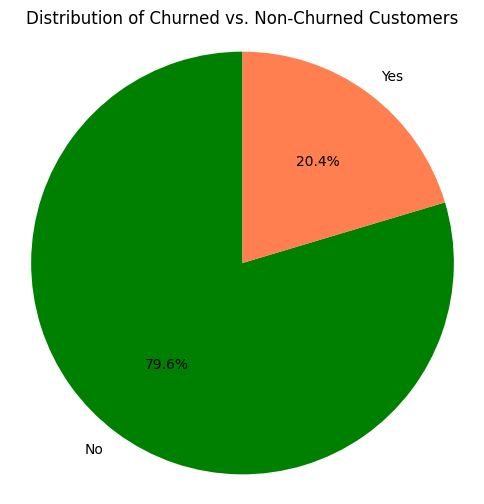

In [26]:
churn_counts = df['Churned'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'coral'])
plt.title('Distribution of Churned vs. Non-Churned Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

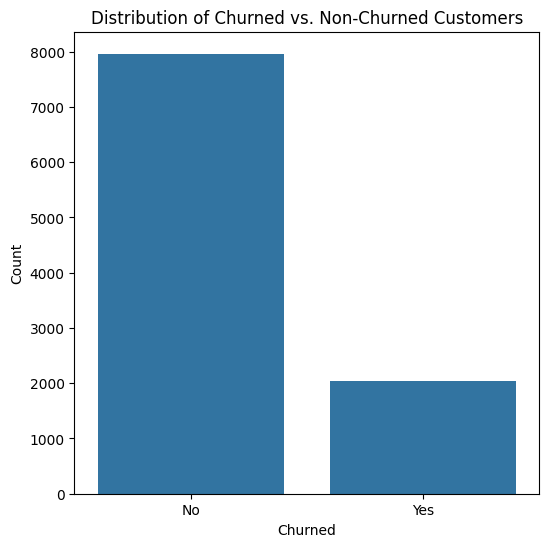

In [27]:
churn_counts = df['Churned'].value_counts()

plt.figure(figsize=(6, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribution of Churned vs. Non-Churned Customers')
plt.xlabel('Churned')
plt.ylabel('Count')
plt.show()

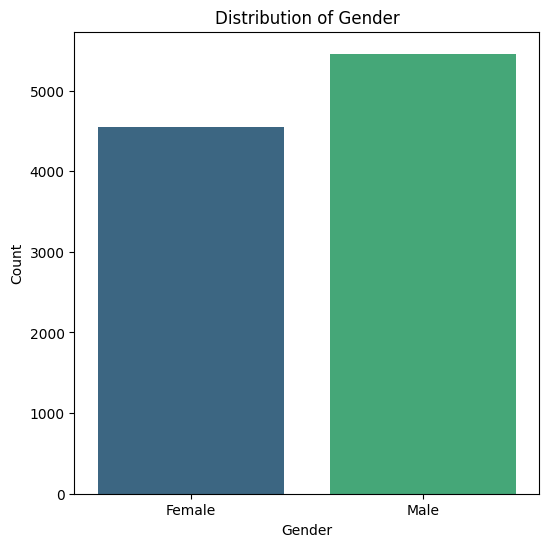

In [28]:
# Bar plot for Gender
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

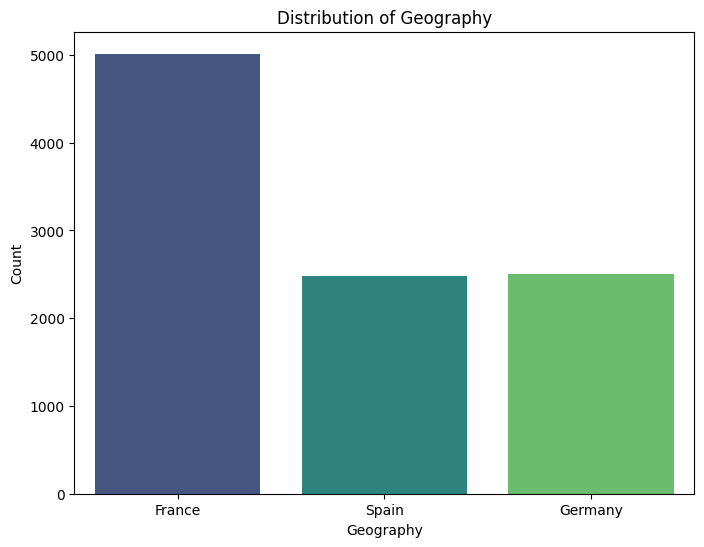

In [29]:
# Bar plot for Geography
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', data=df, palette='viridis')
plt.title('Distribution of Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

# majority of customers are from France, followed by Germany and Spain, which have a similar number of customers.
#the bank could develop targeted marketing campaigns or product offerings that are more appealing to customers in high-churn regions.
#The bank could analyze what competitors in high-churn countries are offering and adjust their own strategies accordingly

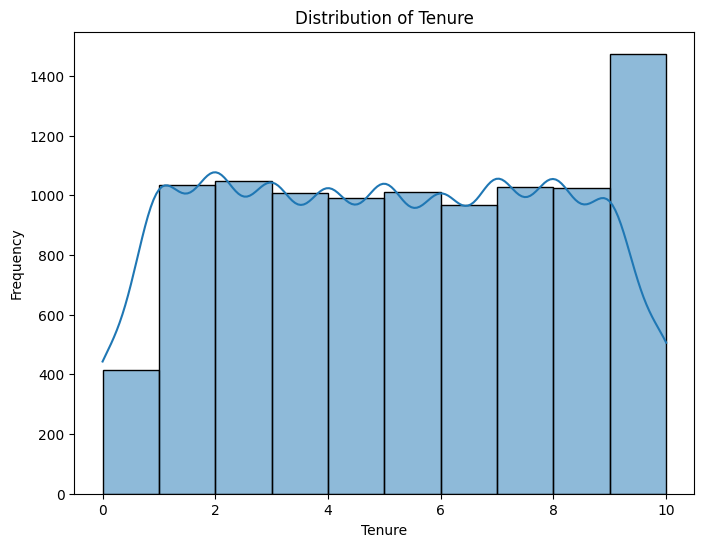

In [30]:
# Histogram for Tenure
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Tenure', bins=10, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

#Tenure: The relatively even distribution of tenure suggests that churn is not heavily concentrated among customers with very short or very long tenures.
#This means the bank might need to look at other factors influencing churn across all tenure groups, rather than focusing solely on new or very old customers.

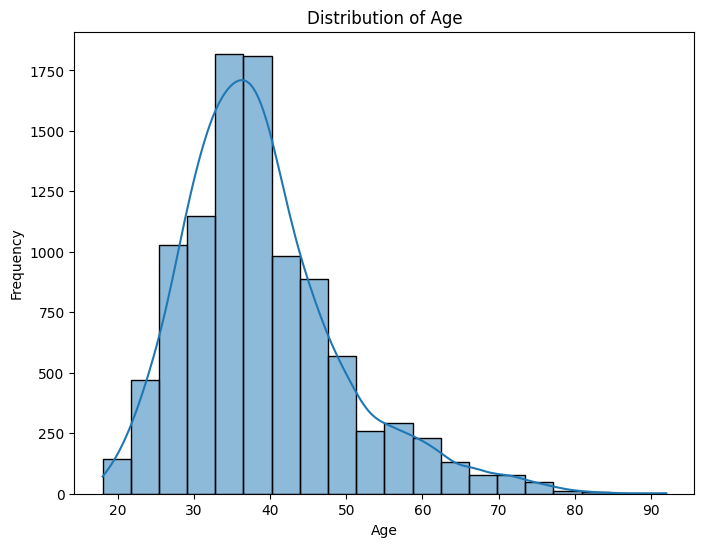

In [31]:
# Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Age: The histogram shows that a large portion of customers are in the middle age range (late 20s to early 40s).
#If the churn rate is higher in this age group, the bank might consider tailoring products, services, or marketing campaigns specifically for this demographic

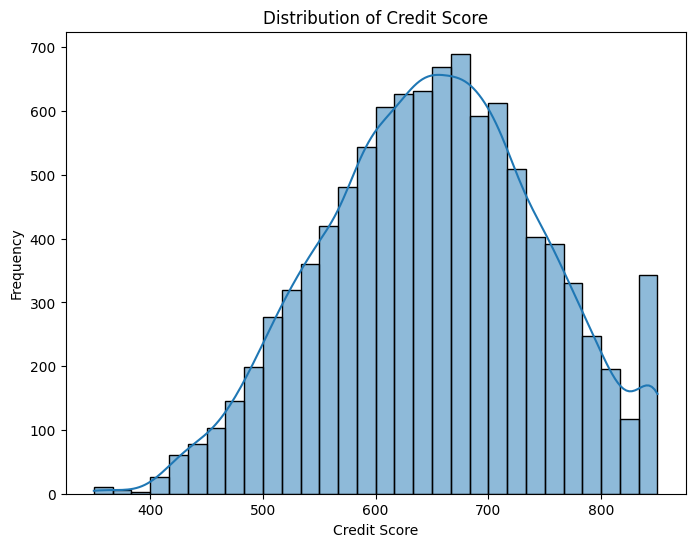

In [32]:
# Histogram for CreditScore
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='CreditScore', bins=30, kde=True)
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

#Credit Score: The distribution of credit scores is somewhat normal, with a peak around the average.
#If customers with certain credit score ranges are more likely to churn, the bank could investigate if their financial products or services are meeting the needs of those customers.
#For example, customers with lower credit scores might benefit from financial literacy programs or alternative product offerings.

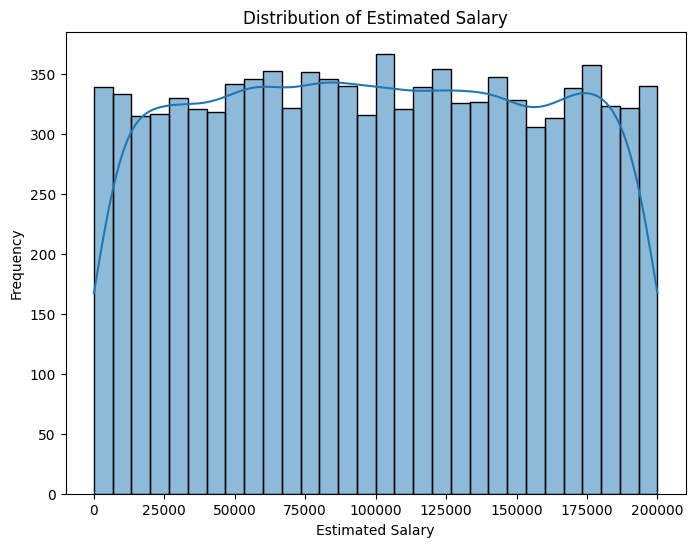

In [33]:
# Histogram for EstimatedSalary
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='EstimatedSalary', bins=30, kde=True)
plt.title('Distribution of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

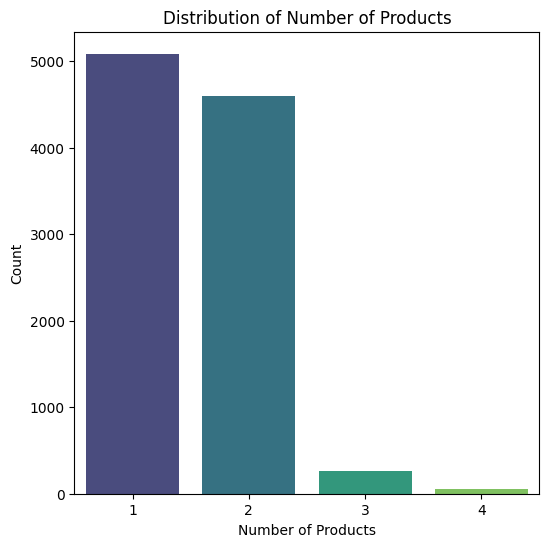

In [34]:
# Bar plot for NumOfProducts
plt.figure(figsize=(6, 6))
sns.countplot(x='NumOfProducts', data=df, palette='viridis')
plt.title('Distribution of Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

#1.Product Usage and Engagement: Customers with more products might be more deeply engaged with the bank and therefore less likely to churn.
#Conversely, customers with only one product might be at higher risk.

#2.Cross-selling Opportunities: The bank could focus on cross-selling additional products to customers who currently only have one, potentially increasing their engagement and reducing churn risk.

#3.Complexity and Satisfaction: While having more products might indicate engagement, it's also worth considering if customers with many products face any challenges or dissatisfaction that could lead to churn.



array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>, <Axes: >]],
      dtype=object)

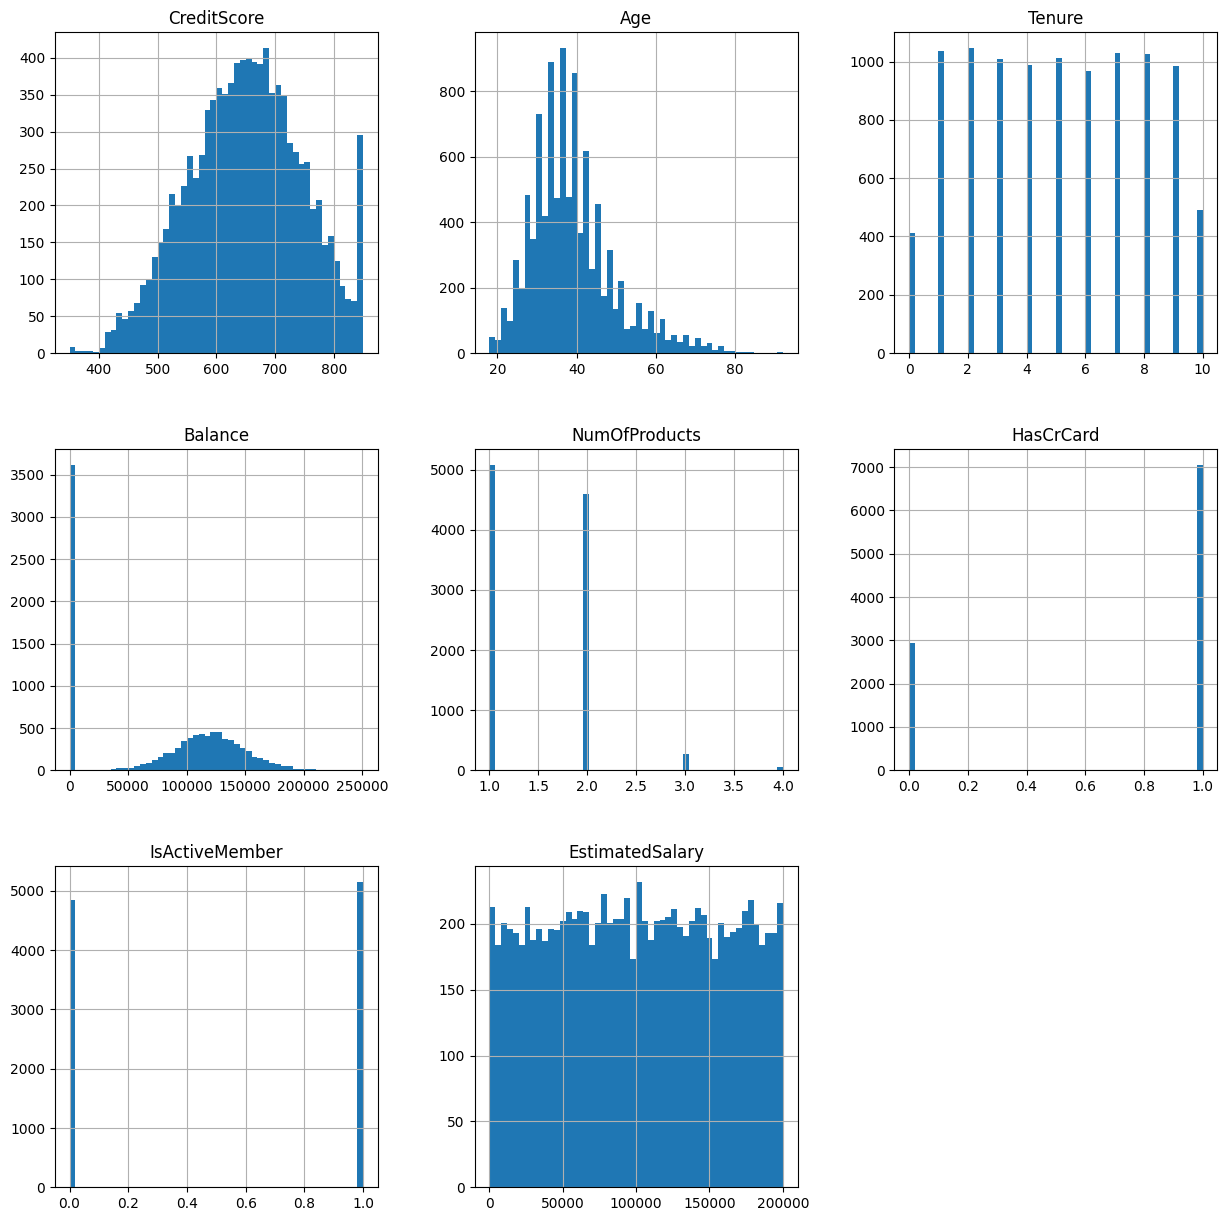

In [35]:
df.hist(figsize=(15,15),bins=50)

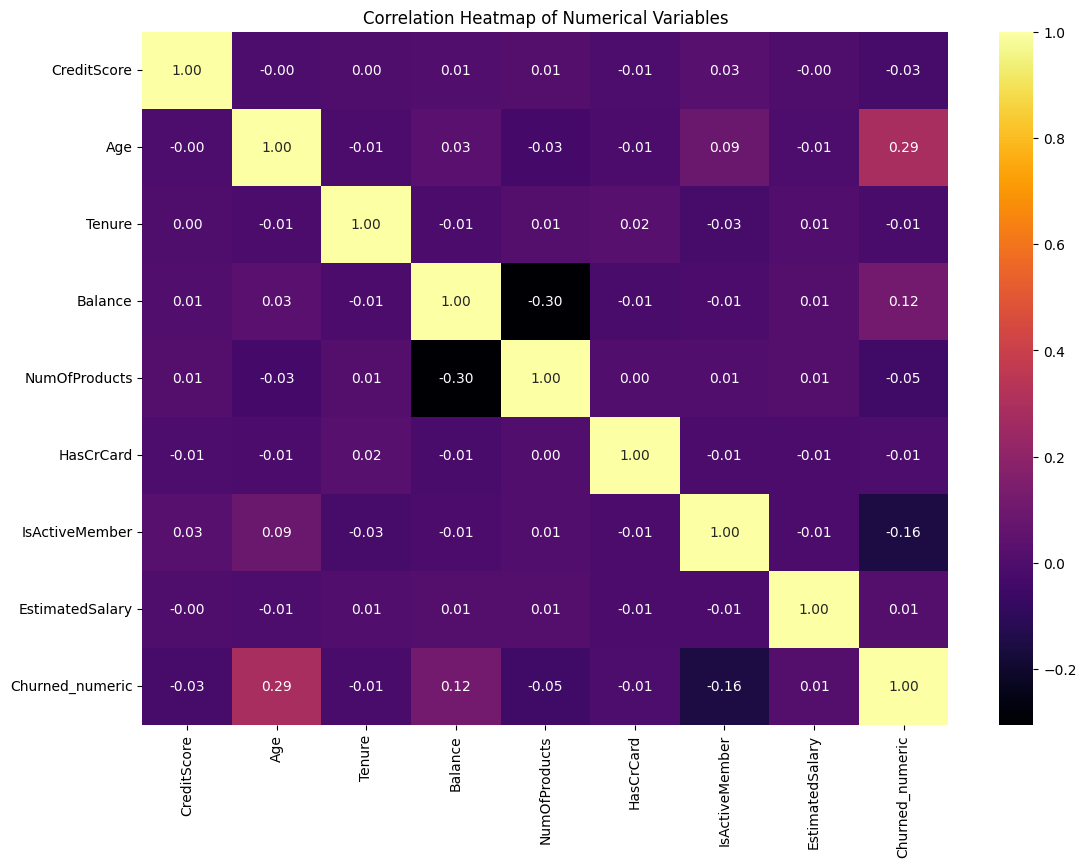

In [36]:
# Convert 'Churned' back to numerical for correlation calculation
df['Churned_numeric'] = df['Churned'].map({'No': 0, 'Yes': 1})

# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Generate the heatmap
plt.figure(figsize=(13,9))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Drop the temporary numeric churn column
df = df.drop('Churned_numeric', axis=1)

In [37]:
print("Unique values for Geography:")
print(df['Geography'].value_counts())
print("\nUnique values for Gender:")
print(df['Gender'].value_counts())
print("\nUnique values for HasCrCard:")
print(df['HasCrCard'].value_counts())

Unique values for Geography:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Unique values for Gender:
Gender
Male      5457
Female    4543
Name: count, dtype: int64

Unique values for HasCrCard:
HasCrCard
1    7055
0    2945
Name: count, dtype: int64


In [38]:
# Perform one-hot encoding on categorical features
df = pd.get_dummies(df, columns=['Geography', 'Gender', 'HasCrCard'], drop_first=True)

display(df.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Churned,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1
0,619,42,2,0.00,1,1,101348.88,Yes,False,False,False,True
1,608,41,1,83807.86,1,1,112542.58,No,False,True,False,False
2,502,42,8,159660.80,3,0,113931.57,Yes,False,False,False,True
3,699,39,1,0.00,2,0,93826.63,No,False,False,False,False
4,850,43,2,125510.82,1,1,79084.10,No,False,True,False,True


In [39]:
df["Churned"].replace({"No":0,"Yes":1},inplace=True)

In [40]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Churned,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1
0,619,42,2,0.00,1,1,101348.88,1,False,False,False,True
1,608,41,1,83807.86,1,1,112542.58,0,False,True,False,False
2,502,42,8,159660.80,3,0,113931.57,1,False,False,False,True
3,699,39,1,0.00,2,0,93826.63,0,False,False,False,False
4,850,43,2,125510.82,1,1,79084.10,0,False,True,False,True


In [41]:
continuous_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

print("Skewness of continuous features:")
print(df[continuous_features].skew())

Skewness of continuous features:
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
EstimatedSalary    0.002085
dtype: float64


Age Feature is highly right-skewed , which conveys that there is presence of positive outliers.
Skewness can negatively impact the performance of certain machine learning algorithms, like DecisionTree & Linear Models.




To overcome the right-skewed distribution we can use log normal transformation to achieve a normal distribution

Skewness of Age_log after transformation:
0.20336041516983316


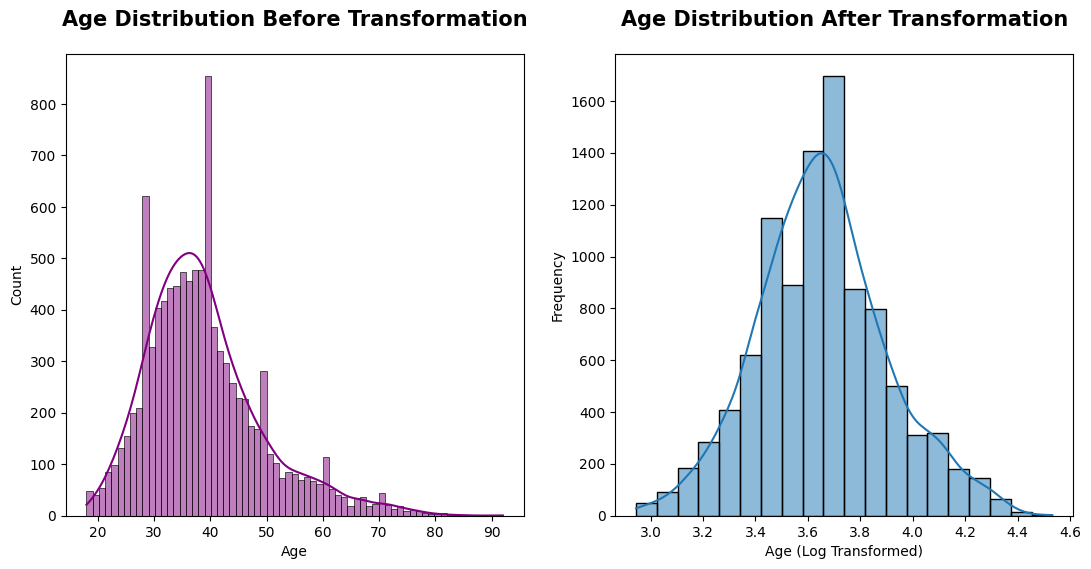

In [42]:
# Apply log transformation to the 'Age' column
df['Age_log'] = np.log1p(df['Age'])

# Display the skewness of the transformed column
print("Skewness of Age_log after transformation:")
print(df['Age_log'].skew())

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(df['Age'], color="purple", kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=15,pad=20)


# You can also visualize the distribution after transformation to see the effect
plt.subplot(1,2,2)
sns.histplot(data=df, x='Age_log', bins=20, kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=15,pad=20)
plt.xlabel('Age (Log Transformed)')
plt.ylabel('Frequency')
plt.show()

In [43]:
X = df.drop(columns=["Churned"])
y = df["Churned"]

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,Age_log
7389,667,34,5,0.00,2,0,163830.64,False,True,False,True,3.555348
9275,427,42,1,75681.52,1,1,57098.00,True,False,True,True,3.761200
2995,535,29,2,112367.34,1,0,185630.76,False,False,False,True,3.401197
5316,654,40,5,105683.63,1,0,173617.09,False,True,True,True,3.713572
356,850,57,8,126776.30,2,1,132298.49,False,True,False,True,4.060443


In [46]:
y_train.head()

,Churned
7389,0
9275,0
2995,0
5316,0
356,0


In [47]:
smt = SMOTE(random_state=42)

In [48]:
X_train_resampled,y_train_resampled = smt.fit_resample(X_train,y_train)

In [49]:
X_train_resampled.shape,y_train_resampled.shape

((12736, 12), (12736,))

In [50]:
X_train_resampled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,Age_log
0,667,34,5,0.00,2,0,163830.64,False,True,False,True,3.555348
1,427,42,1,75681.52,1,1,57098.00,True,False,True,True,3.761200
2,535,29,2,112367.34,1,0,185630.76,False,False,False,True,3.401197
3,654,40,5,105683.63,1,0,173617.09,False,True,True,True,3.713572
4,850,57,8,126776.30,2,1,132298.49,False,True,False,True,4.060443


In [51]:
y_train_resampled.head()

,Churned
0,0
1,0
2,0
3,0
4,0


In [52]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [54]:
# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_proba_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]

In [55]:
log_reg.score(X_test_scaled,y_test)

0.668

In [56]:
log_reg.score(X_train_scaled,y_train_resampled)

0.7199277638190955

In [57]:
# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# Calculate ROC AUC
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
print(f"Logistic Regression ROC AUC: {log_reg_roc_auc:.4f}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77      1595
           1       0.31      0.50      0.38       405

    accuracy                           0.67      2000
   macro avg       0.58      0.61      0.58      2000
weighted avg       0.74      0.67      0.69      2000

Logistic Regression Confusion Matrix:
[[1133  462]
 [ 202  203]]
Logistic Regression ROC AUC: 0.6314


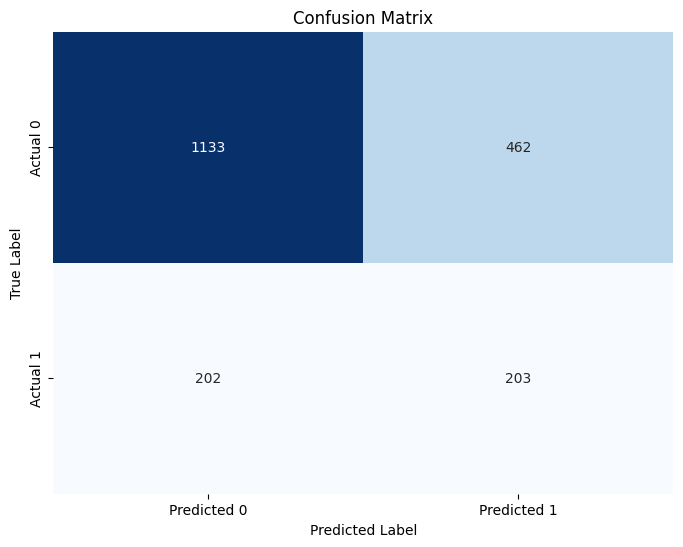

In [58]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

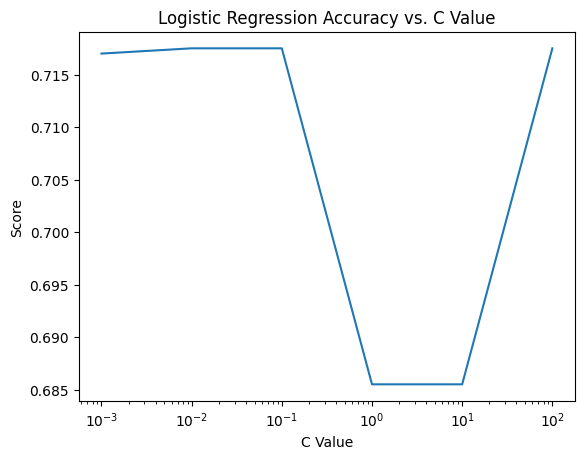

Best Logistic Regression Accuracy: 0.7175
Best C value: 0.01


In [59]:
# Create a list to store accuracy scores
scoreListLR = []

# Define a range of C values to test
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

for c in C_values:
    # Initialize Logistic Regression model with different C values
    lr_tuned = LogisticRegression(C=c, random_state=42, solver='liblinear') # Using 'liblinear' solver for smaller datasets and simplicity
    lr_tuned.fit(X_train_resampled, y_train_resampled)
    scoreListLR.append(lr_tuned.score(X_test_scaled, y_test))

# Plot the accuracy scores for different C values
plt.plot(C_values, scoreListLR)
plt.xscale('log') # Use a log scale for C values
plt.xlabel("C Value")
plt.ylabel("Score")
plt.title("Logistic Regression Accuracy vs. C Value")
plt.show()

# Find the best accuracy and the corresponding C value
best_RFAcc = max(scoreListLR)
best_C_value = C_values[scoreListLR.index(best_RFAcc)]

print(f"Best Logistic Regression Accuracy: {best_RFAcc:.4f}")
print(f"Best C value: {best_C_value}")

Logistic Regression Feature Importances (Coefficients):


,feature,coefficient,abs_coefficient
5,IsActiveMember,-1.153215,1.153215
4,NumOfProducts,-0.735451,0.735451
7,Geography_Germany,0.713437,0.713437
10,HasCrCard_1,0.363050,0.363050
8,Geography_Spain,0.239665,0.239665
11,Age_log,-0.223555,0.223555
1,Age,0.120992,0.120992
2,Tenure,-0.104309,0.104309
9,Gender_Male,0.066642,0.066642
0,CreditScore,-0.002689,0.002689


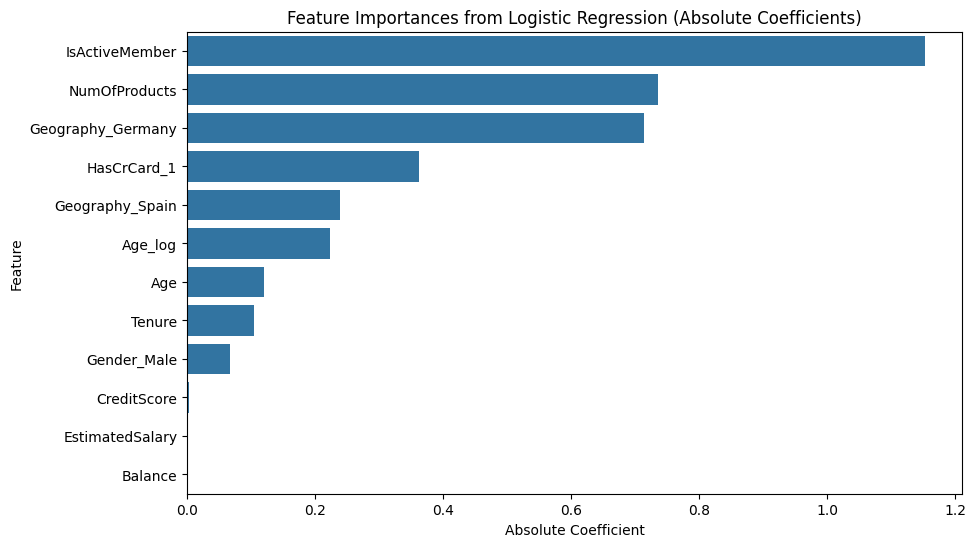

In [60]:
# Get the coefficients from the trained Logistic Regression model
coefficients = log_reg.coef_[0]

# Get the feature names
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df_lr = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

# Sort by the absolute value of the coefficient to see the most influential features
importance_df_lr['abs_coefficient'] = abs(importance_df_lr['coefficient'])
importance_df_lr = importance_df_lr.sort_values('abs_coefficient', ascending=False)

# Display feature importances (coefficients)
print("Logistic Regression Feature Importances (Coefficients):")
display(importance_df_lr[['feature', 'coefficient', 'abs_coefficient']])

# Optionally, visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='abs_coefficient', y='feature', data=importance_df_lr)
plt.title('Feature Importances from Logistic Regression (Absolute Coefficients)')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()

In [61]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(random_state=42)

In [62]:
# Predict on the test set
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

In [63]:
rf.score(X_train_scaled,y_train_resampled)

0.5021199748743719

In [64]:
rf.score(X_test_scaled,y_test)

0.7975

Classification report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000

Confusion matrix:
 [[1595    0]
 [ 405    0]]
Random Forest Accuracy:  0.7975
Random Forest ROC AUC :  0.6812121212121213


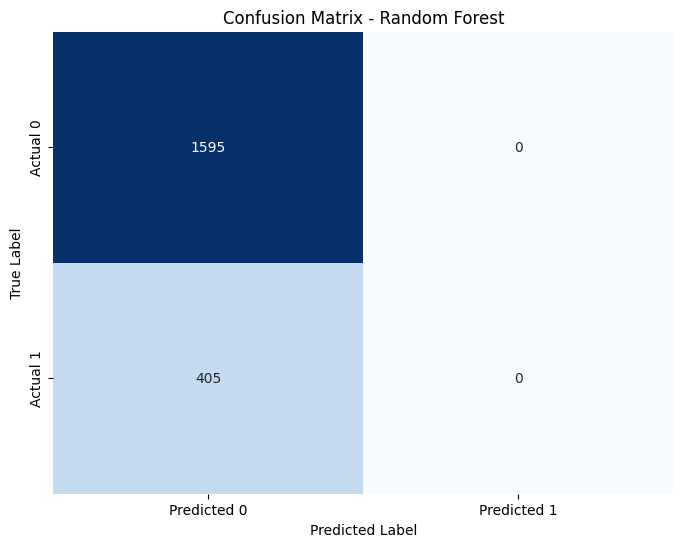

In [65]:
# Evaluate the model
print('Classification report:\n', classification_report(y_test, y_pred_rf))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_rf))
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print('Random Forest ROC AUC : ', roc_auc_score(y_test, y_pred_proba_rf))

# Generate and plot the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

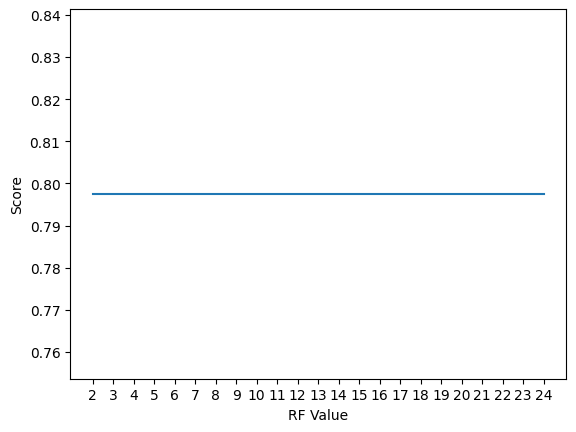

Random Forest Accuracy:  79.75%


In [66]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train_resampled,y_train_resampled)
    scoreListRF.append(RFclassifier.score(X_test_scaled, y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

Random Forest Feature Importances:


,feature,importance
11,Age_log,0.186684
1,Age,0.138075
3,Balance,0.112960
5,IsActiveMember,0.101102
6,EstimatedSalary,0.099634
0,CreditScore,0.092791
4,NumOfProducts,0.088681
7,Geography_Germany,0.063208
2,Tenure,0.060112
8,Geography_Spain,0.021358


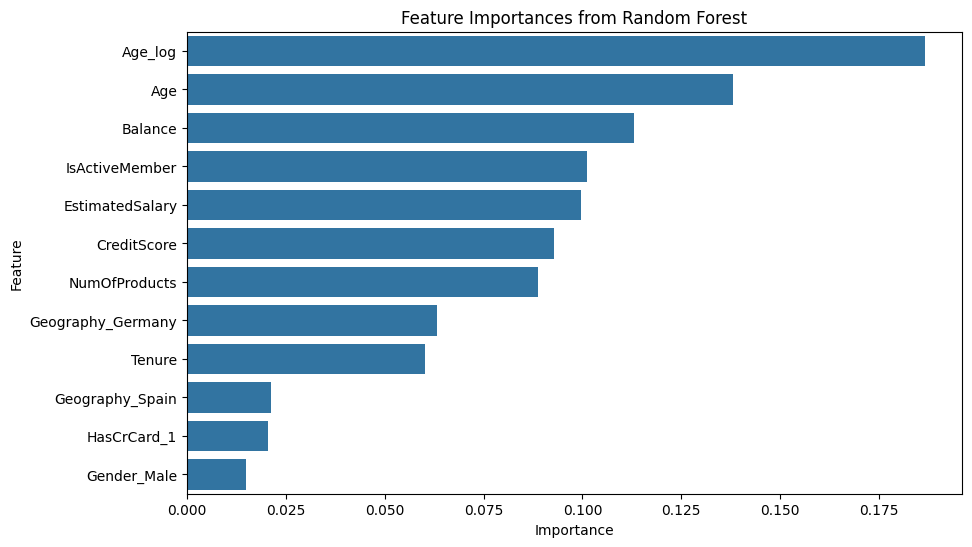

In [67]:
# Get feature importances from the trained Random Forest model
feature_importances_rf = rf.feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df_rf = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_rf})

# Sort by importance
importance_df_rf = importance_df_rf.sort_values('importance', ascending=False)

# Display feature importances
print("Random Forest Feature Importances:")
display(importance_df_rf)

# Optionally, visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df_rf)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [68]:
xgb=XGBClassifier(random_state=42)
xgb.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [69]:
# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test_scaled)
y_pred_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

In [70]:
xgb.score(X_train_scaled,y_train_resampled)

0.5001570351758794

In [71]:
xgb.score(X_test_scaled,y_test)

0.7975

In [72]:
# Evaluate the model
print('Classification report:\n', classification_report(y_test, y_pred_xgb))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_xgb))
print("XGBoost Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print('XGBoost ROC AUC : ', roc_auc_score(y_test, y_pred_proba_xgb))

Classification report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000

Confusion matrix:
 [[1595    0]
 [ 405    0]]
XGBoost Accuracy:  0.7975
XGBoost ROC AUC :  0.5276512248926042


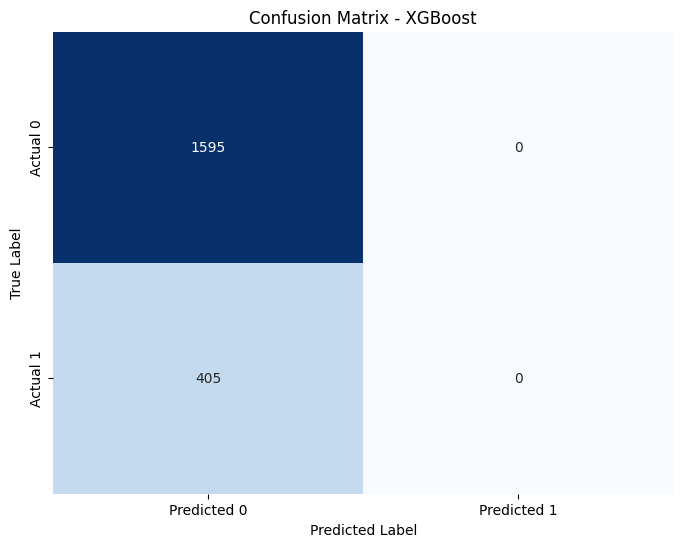

In [73]:
# Generate and plot the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()

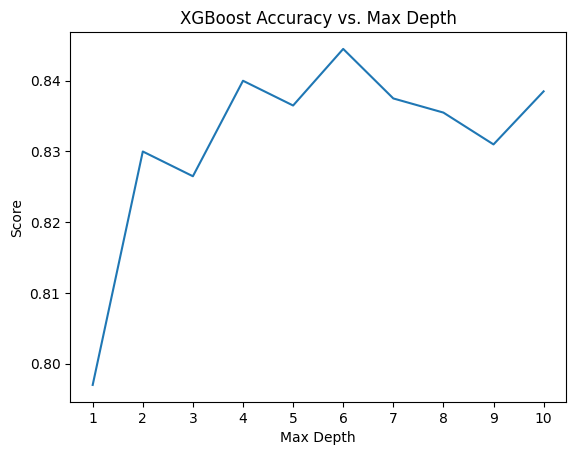

XGBoost best accuracy: 0.8445
Best max_depth for XGBoost: 6


In [74]:
scoreListXGB = []
# Using a smaller range for max_depth for XGBoost as trees are typically shallower
for i in range(1, 11):
    # Initialize XGBoost classifier with different max_depth
    xgb_tuned = XGBClassifier(max_depth=i, random_state=42, use_label_encoder=False, eval_metric='logloss')

    xgb_tuned.fit(X_train_scaled, y_train_resampled)
    scoreListXGB.append(xgb_tuned.score(X_test_scaled, y_test))

plt.plot(range(1, 11), scoreListXGB)
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.title("XGBoost Accuracy vs. Max Depth")
plt.show()

XGBAcc = max(scoreListXGB)
best_max_depth_xgb = range(1, 11)[scoreListXGB.index(XGBAcc)]

print(f"XGBoost best accuracy: {XGBAcc:.4f}")
print(f"Best max_depth for XGBoost: {best_max_depth_xgb}")

XGBoost Feature Importances:


,feature,importance
5,IsActiveMember,0.286967
11,Age_log,0.150455
7,Geography_Germany,0.143734
4,NumOfProducts,0.143652
8,Geography_Spain,0.076228
10,HasCrCard_1,0.057723
3,Balance,0.041818
2,Tenure,0.023297
6,EstimatedSalary,0.020714
0,CreditScore,0.019586


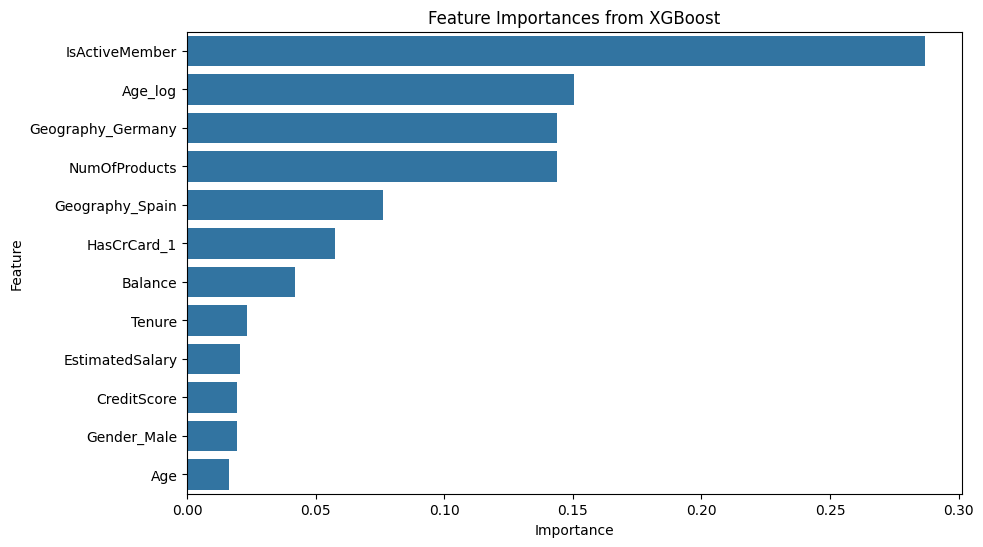

In [75]:
# Train an XGBoost classifier with the best max_depth
best_max_depth_xgb = 6 # Based on the previous tuning result

xgb_best = XGBClassifier(max_depth=best_max_depth_xgb, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_best.fit(X_train_scaled, y_train_resampled)

# Get feature importances
feature_importances_xgb = xgb_best.feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df_xgb = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_xgb})

# Sort by importance
importance_df_xgb = importance_df_xgb.sort_values('importance', ascending=False)

# Display feature importances
print("XGBoost Feature Importances:")
display(importance_df_xgb)

# Optionally, visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df_xgb)
plt.title('Feature Importances from XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [76]:
DT=DecisionTreeClassifier()
DT.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier()

In [77]:
DT.score(X_train_scaled,y_train_resampled)

0.5287374371859297

In [78]:
DT.score(X_test_scaled,y_test)

0.7725

In [79]:
y_pred_dt=DT.predict(X_test_scaled)
y_pred_proba_dt=DT.predict_proba(X_test_scaled)[:,1]

In [80]:
# Evaluate the model
print('Classification report:\n', classification_report(y_test, y_pred_dt))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_dt))
print('Decision Tree ROC AUC : ', roc_auc_score(y_test, y_pred_proba_dt))

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      1595
           1       0.29      0.09      0.13       405

    accuracy                           0.77      2000
   macro avg       0.55      0.52      0.50      2000
weighted avg       0.70      0.77      0.72      2000

Confusion matrix:
 [[1510   85]
 [ 370   35]]
Decision Tree Accuracy:  0.7725
Decision Tree ROC AUC :  0.5165641085181315


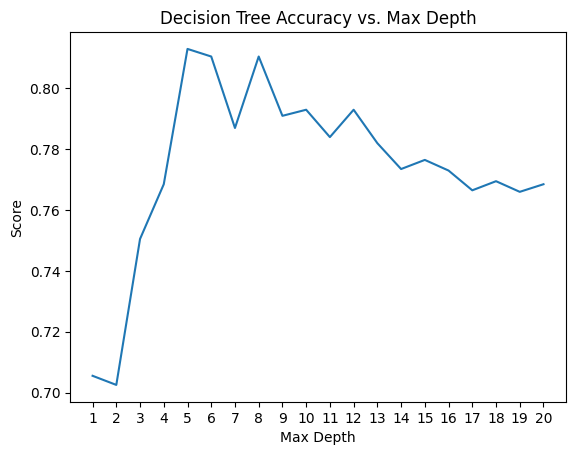

Decision Tree best accuracy: 0.8130
Best max_depth for Decision Tree: 5


In [81]:
scoreListDT = []
for i in range(1,21):
    DTclassifier = DecisionTreeClassifier(max_depth = i, random_state = 42)
    DTclassifier.fit(X_train_scaled, y_train_resampled)
    scoreListDT.append(DTclassifier.score(X_test_scaled, y_test))

plt.plot(range(1,21), scoreListDT)
plt.xticks(np.arange(1,21,1))
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.title("Decision Tree Accuracy vs. Max Depth")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree best accuracy: {:.4f}".format(DTAcc))
best_max_depth_dt = range(1, 21)[scoreListDT.index(DTAcc)]
print(f"Best max_depth for Decision Tree: {best_max_depth_dt}")

Decision Tree Feature Importances:


,feature,importance
11,Age_log,0.416146
5,IsActiveMember,0.223275
4,NumOfProducts,0.161532
7,Geography_Germany,0.118353
3,Balance,0.065688
8,Geography_Spain,0.013214
1,Age,0.001792
0,CreditScore,0.000000
2,Tenure,0.000000
6,EstimatedSalary,0.000000


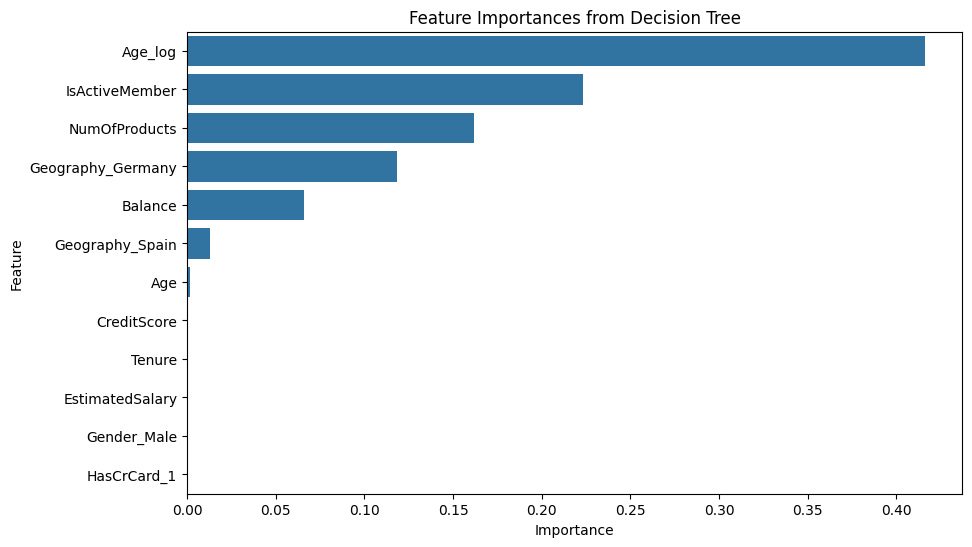

In [82]:
# Train a Decision Tree classifier with the best max_depth
best_max_depth_dt = 5 # Based on the previous tuning result

DT_best = DecisionTreeClassifier(max_depth=best_max_depth_dt, random_state=42)
DT_best.fit(X_train_scaled, y_train_resampled)

# Get feature importances
feature_importances = DT_best.feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values('importance', ascending=False)

# Display feature importances
print("Decision Tree Feature Importances:")
display(importance_df)

# Optionally, visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importances from Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [83]:
# --- Evaluate Tuned Logistic Regression ---
# Train Logistic Regression with best C
best_C_value = 0.01 # Based on previous tuning
log_reg_tuned = LogisticRegression(C=best_C_value, random_state=42, solver='liblinear')
log_reg_tuned.fit(X_train_scaled, y_train_resampled)
y_pred_log_reg_tuned = log_reg_tuned.predict(X_test_scaled)
y_pred_proba_log_reg_tuned = log_reg_tuned.predict_proba(X_test_scaled)[:, 1]

print("--- Tuned Logistic Regression Evaluation ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg_tuned))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg_tuned))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_log_reg_tuned):.4f}")
print("-" * 40)

# --- Evaluate Tuned Decision Tree ---
# Train Decision Tree with best max_depth
best_max_depth_dt = 5 # Based on previous tuning
dt_tuned = DecisionTreeClassifier(max_depth=best_max_depth_dt, random_state=42)
dt_tuned.fit(X_train_scaled, y_train_resampled)
y_pred_dt_tuned = dt_tuned.predict(X_test_scaled)
y_pred_proba_dt_tuned = dt_tuned.predict_proba(X_test_scaled)[:, 1]

print("--- Tuned Decision Tree Evaluation ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt_tuned))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_tuned))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_dt_tuned):.4f}")
print("-" * 40)

# --- Evaluate Tuned XGBoost ---
# Train XGBoost with best max_depth
best_max_depth_xgb = 6 # Based on previous tuning
xgb_tuned = XGBClassifier(max_depth=best_max_depth_xgb, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_tuned.fit(X_train_scaled, y_train_resampled)
y_pred_xgb_tuned = xgb_tuned.predict(X_test_scaled)
y_pred_proba_xgb_tuned = xgb_tuned.predict_proba(X_test_scaled)[:, 1]


print("--- Tuned XGBoost Evaluation ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb_tuned))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_tuned))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_xgb_tuned):.4f}")
print("-" * 40)

# --- Evaluate Trained Random Forest (from previous cell) ---
# Use the 'rf' model already trained in cell F7At0N_-NjQs
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("--- Random Forest Evaluation (from previous training) ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
print("-" * 40)

--- Tuned Logistic Regression Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1595
           1       0.40      0.63      0.49       405

    accuracy                           0.73      2000
   macro avg       0.65      0.69      0.65      2000
weighted avg       0.79      0.73      0.75      2000

Confusion Matrix:
[[1215  380]
 [ 151  254]]
ROC AUC: 0.7380
----------------------------------------
--- Tuned Decision Tree Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1595
           1       0.53      0.68      0.59       405

    accuracy                           0.81      2000
   macro avg       0.72      0.76      0.74      2000
weighted avg       0.83      0.81      0.82      2000

Confusion Matrix:
[[1352  243]
 [ 131  274]]
ROC AUC: 0.8388
----------------------------------------
--- Tuned XG

In [85]:
# Example of new raw data (replace with your actual new raw data)
# This data should be in the same format as your original df before preprocessing
new_raw_data = pd.DataFrame({
    'CreditScore': [650],
    'Age': [40],
    'Tenure': [5],
    'Balance': [100000],
    'NumOfProducts': [2],
    'HasCrCard': [1], # Original categorical value
    'IsActiveMember': [1],
    'EstimatedSalary': [120000],
    'Geography': ['Spain'], # Original categorical value
    'Gender': ['Female']    # Original categorical value
})

# --- Apply the same preprocessing steps as used for the training data ---

# 1. Drop irrelevant columns (if they existed in the raw data)
# If your new_raw_data doesn't have these, this step might be skipped or adjusted
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
# Check if columns exist before dropping
cols_exist = [col for col in columns_to_drop if col in new_raw_data.columns]
if cols_exist:
    new_data_processed = new_raw_data.drop(columns=cols_exist, axis=1)
else:
    new_data_processed = new_raw_data.copy()


# 2. One-hot encode categorical features (using the same columns as trained on)
categorical_cols = ['Geography', 'Gender', 'HasCrCard']
# Apply one-hot encoding
new_data_processed = pd.get_dummies(new_data_processed, columns=categorical_cols, drop_first=True)

# Ensure all dummy columns from training data exist in new data, add if missing with value 0
# This is important if a category in the new data was not present in the training data
training_cols = X.columns # Get columns from your training features (before scaling)
for col in training_cols:
    if col not in new_data_processed.columns:
        new_data_processed[col] = False # Or 0, depending on how get_dummies created columns

# Ensure the order of columns in new_data_processed matches the training data (X)
new_data_processed = new_data_processed[training_cols]


# 3. Apply the log transformation to the 'Age' column
# Make sure 'Age' column exists and apply transformation
if 'Age' in new_data_processed.columns:
    new_data_processed['Age_log'] = np.log1p(new_data_processed['Age'])


# 4. Scale the numerical features using the *fitted* scaler
# Identify numerical columns based on X.columns (training data columns)
# Exclude original 'Age' if 'Age_log' is used
numerical_cols_for_scaling = [col for col in X.columns if X[col].dtype != 'object'] # Assuming X contains only numeric/boolean after one-hot encoding

# Ensure the order of numerical columns matches the scaler's expectation (based on X_train_scaled)
# This might require careful handling depending on how scaler was fitted.
# A robust way is to select numerical columns in the same order as they appeared in X_train_resampled

# Assuming the scaler was fitted on X_train_resampled with columns in the same order as X
numerical_cols_order = [col for col in X.columns if col in numerical_cols_for_scaling]


# Select only the numerical columns from the processed new data for scaling
new_data_numerical = new_data_processed[numerical_cols_order]


# Scale the numerical features
new_data_scaled_numerical = scaler.transform(new_data_numerical)

# Replace the original numerical columns in new_data_processed with the scaled ones
new_data_processed[numerical_cols_order] = new_data_scaled_numerical


# The final preprocessed data ready for prediction
# Ensure the column order matches the data the model was trained on (X_train_scaled)
# Since we matched X.columns and then scaled numerical columns, the structure should be correct
final_new_data_scaled = new_data_processed


# Make predictions (0 for No Churn, 1 for Yes Churn)
prediction = xgb_tuned.predict(final_new_data_scaled)
print(f"Predicted class: {prediction[0]}")

# Get prediction probabilities
prediction_proba = xgb_tuned.predict_proba(final_new_data_scaled)[:, 1] # Probability of the positive class (churn)
print(f"Predicted probability of churn: {prediction_proba[0]:.4f}")

# You can convert the numerical prediction back to 'Yes' or 'No' if needed
predicted_churn_label = 'Yes' if prediction[0] == 1 else 'No'
print(f"Predicted churn status: {predicted_churn_label}")

Predicted class: 0
Predicted probability of churn: 0.0672
Predicted churn status: No
